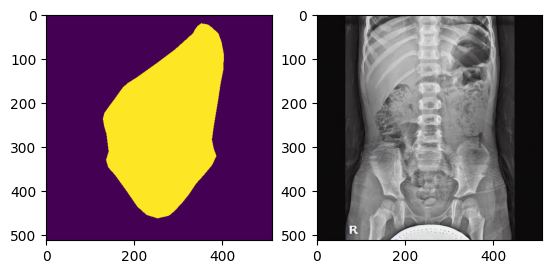

In [92]:
from torch.utils.data import Dataset, DataLoader
import joblib
import numpy as np
import cv2
from PIL import Image
import os
from torch import tensor
from torchvision import transforms
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self,dataframe,image_path):
        self.data = joblib.load(dataframe)
        self.image_path = image_path
        self.W = 512
        self.H = 512
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        row = self.data.iloc[index]
        image_path = os.path.join(self.image_path, row['ImagePath'], row['Filename'])
        image = Image.open(image_path)
        transform = transforms.ToTensor()
        image_tensor = transform(image)
        
        if row['Point'] is None or row['Point'] == 'None':
            mask = np.zeros((self.H,self.W),dtype=np.uint8)
        else:
            points = row['Point']  # 문자열이라면 파싱
            pts = np.array(points, dtype=np.int32).reshape((-1, 1, 2))
            mask = np.zeros((self.H, self.W), dtype=np.uint8)
            cv2.fillPoly(mask, [pts], color=int(row['Class']))
        return image_tensor, mask, int(row['Class'])

Train_CustomDataset = CustomDataset('Train_Data.pkl','../Data\Training/01.원천데이터')
image_tensor, mask, classidx = Train_CustomDataset[5000]

plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
plt.imshow(image_tensor.permute(1,2,0))
plt.show()